<a href="https://colab.research.google.com/github/hjhan1201/AIFFEL_Online_Quest/blob/main/DeepLearning_OneQ8_Overfitting2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

4422102/4422102 [==============================] - 0s 0us/step
전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
print(y_train[0], class_names[y_train[0]])

6 Shirt


In [ ]:
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

<ipython-input-5-b1b31bdb24eb>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


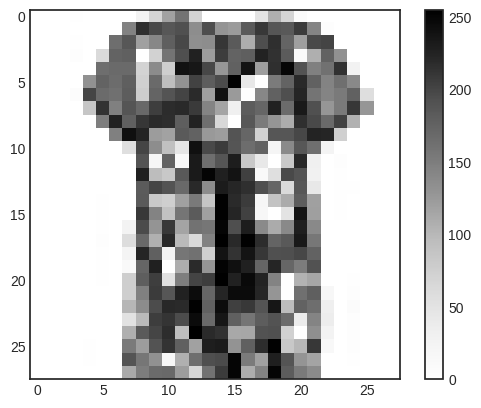

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

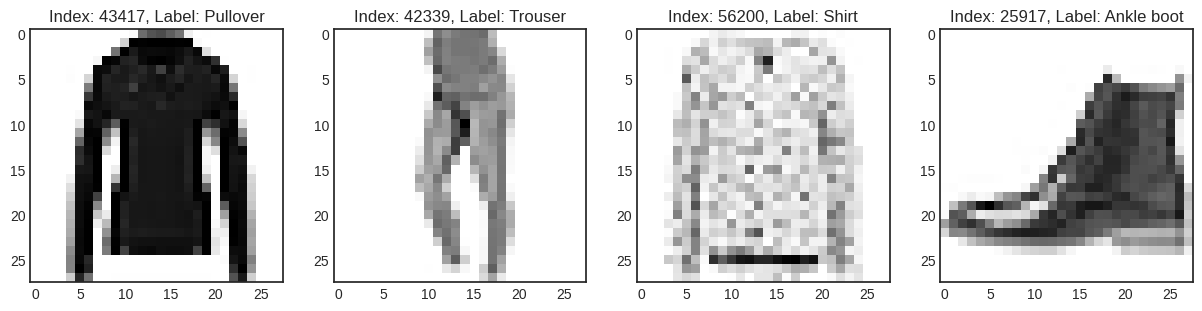

In [ ]:
import numpy as np

num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title(f'Index: {idx}, Label: {class_names[label]}')

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [ ]:
print(x_train[0])

[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
 107  68   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145
 216 197 186 192 135 194 129 123 183 209 187 184 207 143   4   0   0   0
   0   0   0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183
 108 194 216 173 120 197 201   0   0   0   0   0   0   0   0   3   0  61
 174 177   0  71 158 193 226 121 206 174 178 225 214 182  10 107 175 132
   0   0   0   0   0   0   0   0   0 164 168 168  70 137  76 239 235 199
 127 176 238 121 216 249 190 147 161 214  27   0   0   0   0   0   0   0
 132 174 166 178  73 168  94 131 202 180 196 254  42   0 152 174 220 176
 144 163 139   0   0   0   0   0   0   6 200 167 162 180  77 173 189 201
 219 120 240 124   1 141 176 193 223 158 143 153 176  56   0   0   0   0
   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171 226 167
 233 192 127 153 210 127   0   0   0   0   0   0   0 149 226 177 211 219
 217 179 225 163  64   0 186 152 128 109 216 197 16

In [ ]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [ ]:
print(x_train[0])

[0.         0.         0.         0.00392157 0.         0.
 0.         0.         0.09411765 0.27058824 0.4627451  0.62352941
 0.2745098  0.         0.         0.         0.         0.18823529
 0.41960784 0.26666667 0.03137255 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.56862745
 0.84705882 0.77254902 0.72941176 0.75294118 0.52941176 0.76078431
 0.50588235 0.48235294 0.71764706 0.81960784 0.73333333 0.72156863
 0.81176471 0.56078431 0.01568627 0.         0.         0.
 0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.64313725 0.72941176 0.46666667 0.55294118
 0.69803922 0.77647059 0.52156863 0.52941176 0.82745098 0.71764706
 0.42352941 0.76078431 0.84705882 0.67843137 0.47058824 0.77254902
 0.78823529 0.         0.         0.         0.         0.
 0.         0.         0.         0.01176471 0.         0.23921569
 0.68235294 0.69411765 0.         0

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
83/83 [==============================] - 10s 86ms/step - loss: 2.2178 - accuracy: 0.2955 - val_loss: 2.0566 - val_accuracy: 0.3885
Epoch 2/60
83/83 [==============================] - 5s 61ms/step - loss: 1.9344 - accuracy: 0.5301 - val_loss: 1.8239 - val_accuracy: 0.5358
Epoch 3/60
83/83 [==============================] - 5s 62ms/step - loss: 1.7286 - accuracy: 0.6180 - val_loss: 1.6403 - val_accuracy: 0.5951
Epoch 4/60
83/83 [==============================] - 4s 53ms/step - loss: 1.5662 - accuracy: 0.6569 - val_loss: 1.4989 - val_accuracy: 0.6217
Epoch 5/60
83/83 [==============================] - 4s 52ms/step - loss: 1.4375 - accuracy: 0.6766 - val_loss: 1.3832 - val_accuracy: 0.6791
Epoch 6/60
83/83 [==============================] - 4s 53ms/step - loss: 1.3348 - accuracy: 0.6946 - val_loss: 1.2935 - val_accuracy: 0.6776
Epoch 7/60
83/83 [==============================] - 3s 35ms/step - loss: 1.2516 - accuracy: 0.7055 - val_loss: 1.2164 - val_accuracy: 0.6981
Epoch 8/60
8

In [ ]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

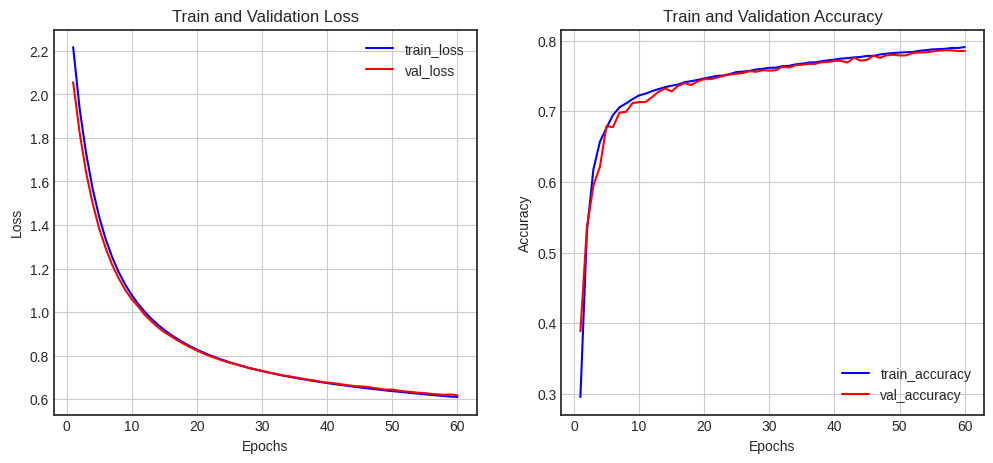

In [ ]:
show_history(history)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6286 - accuracy: 0.7786


[0.6286400556564331, 0.7785999774932861]

In [ ]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

313/313 [==============================] - 1s 3ms/step
[1.1502569e-02 9.3767101e-01 3.9843051e-03 1.9018324e-02 2.1169044e-02
 3.4537512e-05 6.5048044e-03 4.1728905e-05 5.6999892e-05 1.6795231e-05]
1
Trouser


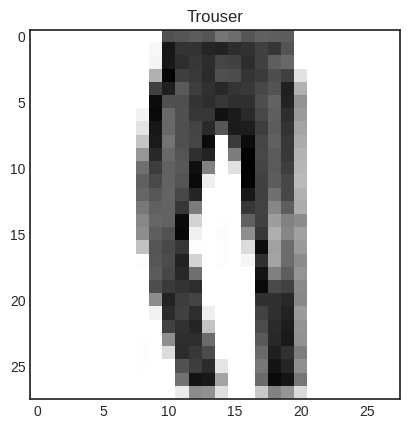

In [ ]:
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

In [ ]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

In [ ]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

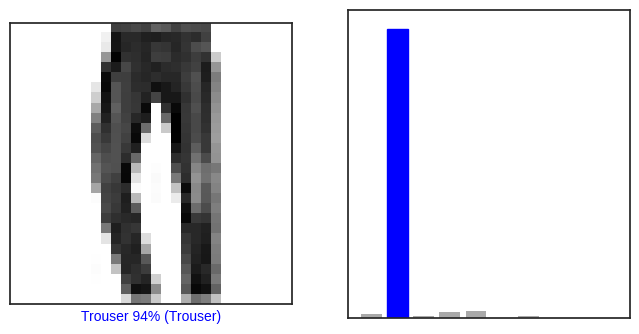

In [ ]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

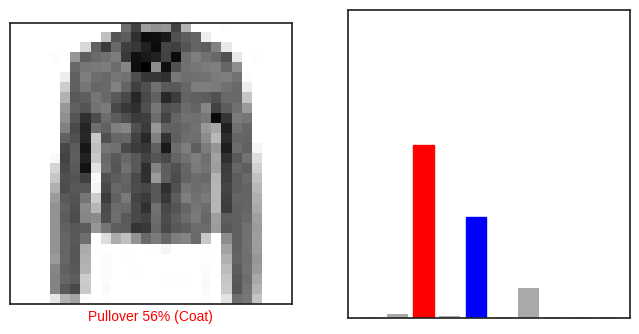

In [ ]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

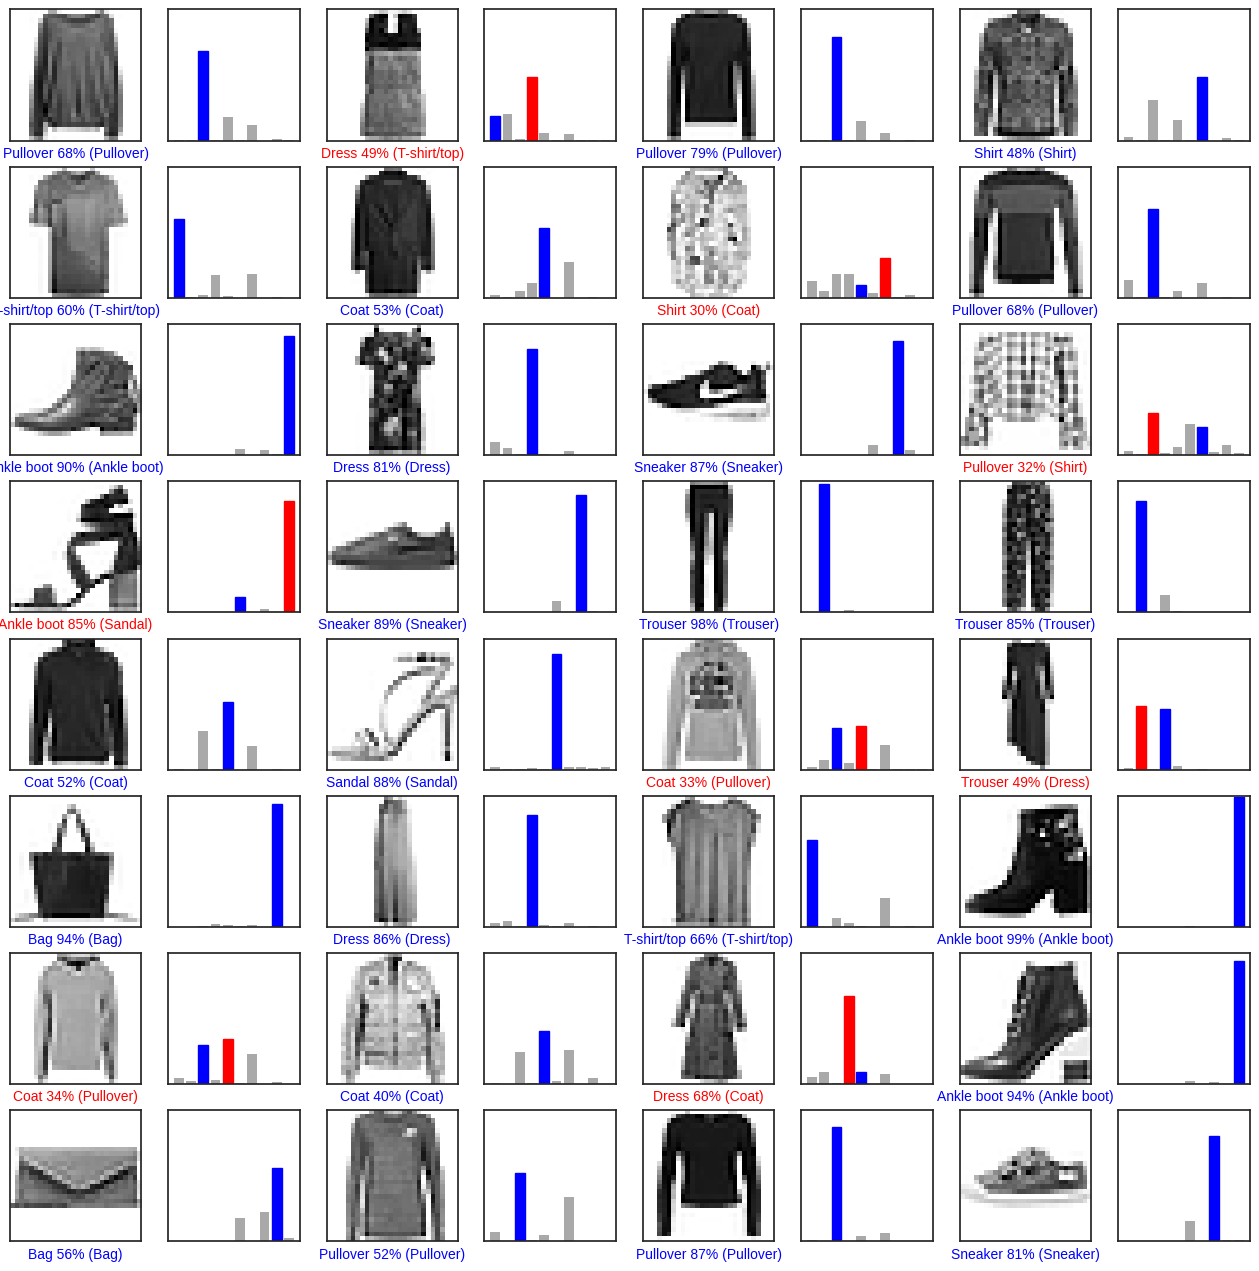

In [ ]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [ ]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1),
                            np.argmax(pred_ys, axis=-1),
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.76      0.77      0.76      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.65      0.68      0.66      1000
       Dress       0.73      0.87      0.79      1000
        Coat       0.64      0.71      0.67      1000
      Sandal       0.86      0.81      0.83      1000
       Shirt       0.54      0.33      0.41      1000
     Sneaker       0.82      0.87      0.84      1000
         Bag       0.90      0.91      0.91      1000
  Ankle boot       0.88      0.92      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.77      0.78      0.77     10000



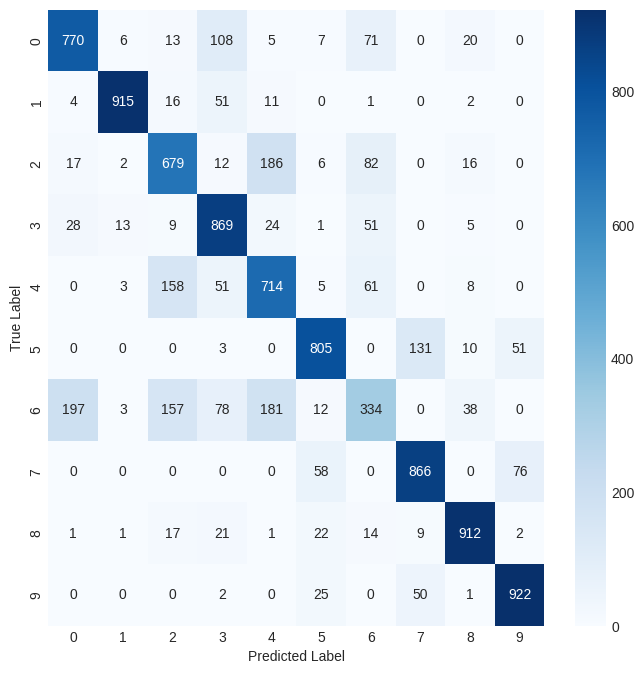

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 모델 최적화

In [ ]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.5948 - accuracy: 0.7947 - val_loss: 0.5946 - val_accuracy: 0.7920
Epoch 2/20
  20/1313 [..............................] - ETA: 7s - loss: 0.5664 - accuracy: 0.7906

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1313/1313 [==============================] - 11s 8ms/step - loss: 0.5672 - accuracy: 0.8030 - val_loss: 0.5711 - val_accuracy: 0.7983
Epoch 3/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.5462 - accuracy: 0.8106 - val_loss: 0.5465 - val_accuracy: 0.8080
Epoch 4/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.5296 - accuracy: 0.8156 - val_loss: 0.5320 - val_accuracy: 0.8158
Epoch 5/20
1313/1313 [==============================] - 11s 8ms/step - loss: 0.5162 - accuracy: 0.8207 - val_loss: 0.5201 - val_accuracy: 0.8206
Epoch 6/20
1313/1313 [==============================] - 11s 8ms/step - loss: 0.5053 - accuracy: 0.8230 - val_loss: 0.5133 - val_accuracy: 0.8225
Epoch 7/20
1313/1313 [==============================] - 10s 7ms/step - loss: 0.4954 - accuracy: 0.8271 - val_loss: 0.5022 - val_accuracy: 0.8262
Epoch 8/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4877 - accuracy: 0.8295 - val_loss: 0.5050 - val_accuracy: 0.822

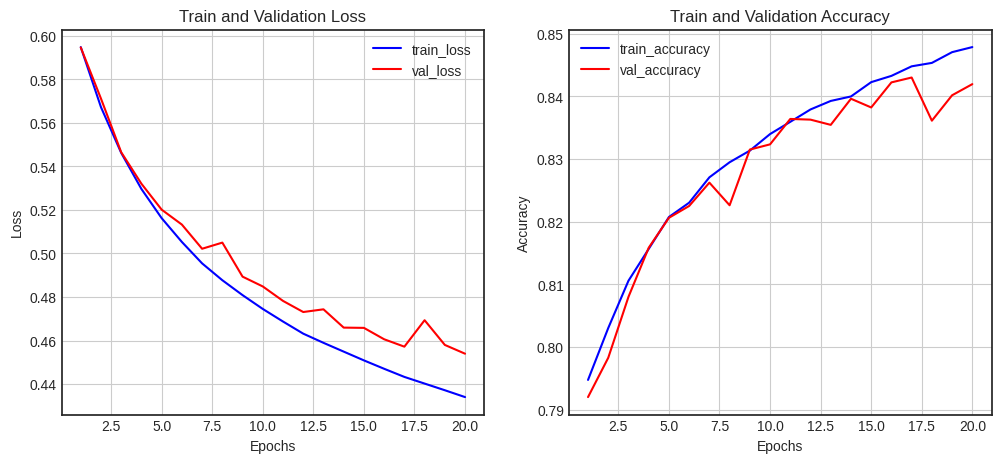

In [ ]:
show_history(history)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4751 - accuracy: 0.8268


[0.4750513732433319, 0.8267999887466431]

In [30]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
history2 = model.fit(x_train, y_train, epochs=20,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])


Epoch 1/20
1313/1313 [==============================] - 22s 17ms/step - loss: 0.5305 - accuracy: 0.8243 - val_loss: 0.5339 - val_accuracy: 0.8161
Epoch 2/20
1313/1313 [==============================] - 22s 17ms/step - loss: 0.4793 - accuracy: 0.8375 - val_loss: 0.4696 - val_accuracy: 0.8422
Epoch 3/20
1313/1313 [==============================] - 16s 12ms/step - loss: 0.4500 - accuracy: 0.8456 - val_loss: 0.4516 - val_accuracy: 0.8463
Epoch 4/20
1313/1313 [==============================] - 19s 14ms/step - loss: 0.4313 - accuracy: 0.8493 - val_loss: 0.4768 - val_accuracy: 0.8323
Epoch 5/20
1313/1313 [==============================] - 15s 11ms/step - loss: 0.4147 - accuracy: 0.8562 - val_loss: 0.4495 - val_accuracy: 0.8434
Epoch 6/20
1313/1313 [==============================] - 17s 13ms/step - loss: 0.4039 - accuracy: 0.8595 - val_loss: 0.4357 - val_accuracy: 0.8481
Epoch 7/20
1313/1313 [==============================] - 19s 14ms/step - loss: 0.3924 - accuracy: 0.8640 - val_loss: 0.4255 -

In [33]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

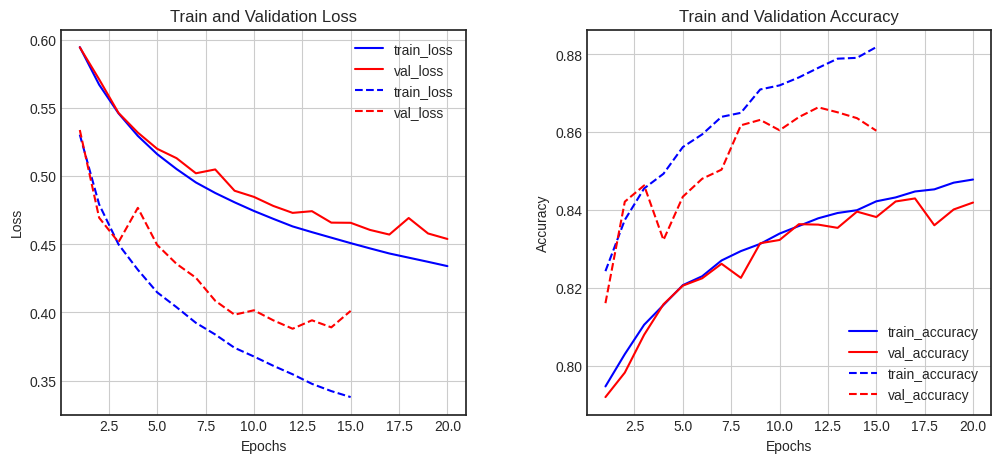

In [34]:
diff_history(history, history2)

In [35]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.4062 - accuracy: 0.8588


[0.4062007963657379, 0.8587999939918518]

In [36]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='ADAM',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
history3 = model.fit(x_train, y_train, epochs=20,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/20
1313/1313 [==============================] - 13s 10ms/step - loss: 0.5063 - accuracy: 0.8210 - val_loss: 0.4274 - val_accuracy: 0.8471
Epoch 2/20
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3782 - accuracy: 0.8624 - val_loss: 0.3683 - val_accuracy: 0.8688
Epoch 3/20
1313/1313 [==============================] - 22s 17ms/step - loss: 0.3348 - accuracy: 0.8765 - val_loss: 0.3784 - val_accuracy: 0.8632
Epoch 4/20
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3101 - accuracy: 0.8840 - val_loss: 0.3382 - val_accuracy: 0.8773
Epoch 5/20
1313/1313 [==============================] - 14s 10ms/step - loss: 0.2905 - accuracy: 0.8921 - val_loss: 0.3353 - val_accuracy: 0.8813
Epoch 6/20
1313/1313 [==============================] - 14s 11ms/step - loss: 0.2744 - accuracy: 0.8964 - val_loss: 0.3445 - val_accuracy: 0.8811
Epoch 7/20
1313/1313 [==============================] - 15s 11ms/step - loss: 0.2638 - accuracy: 0.9009 - val_loss: 0.3333 -

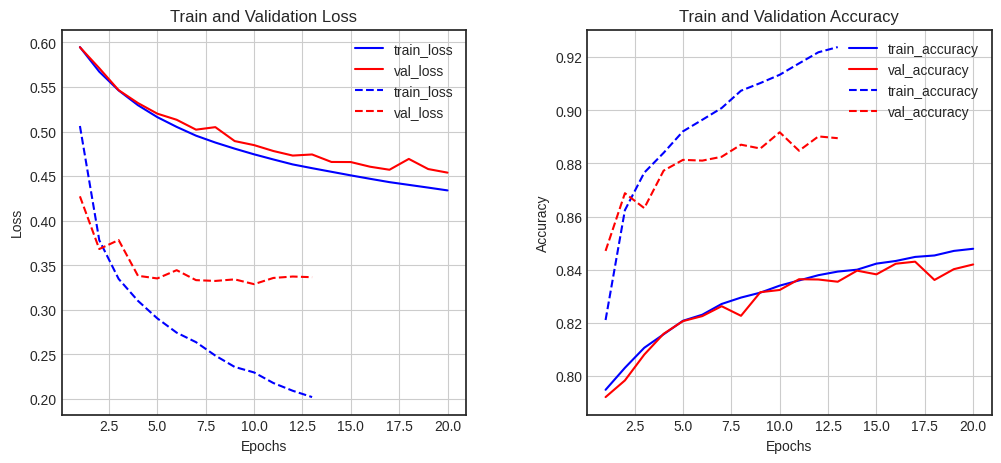

In [38]:
diff_history(history, history3)

In [39]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3422 - accuracy: 0.8830


[0.34216001629829407, 0.8830000162124634]

In [40]:
from tensorflow import keras
from keras.layers import Dense


model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='ADAM',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
history4 = model.fit(x_train, y_train,
                     epochs=20,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/20
1313/1313 [==============================] - 16s 12ms/step - loss: 1.0996 - accuracy: 0.7788 - val_loss: 0.7358 - val_accuracy: 0.7874
Epoch 2/20
1313/1313 [==============================] - 14s 10ms/step - loss: 0.7191 - accuracy: 0.7972 - val_loss: 0.7129 - val_accuracy: 0.7887
Epoch 3/20
1313/1313 [==============================] - 14s 10ms/step - loss: 0.6816 - accuracy: 0.8038 - val_loss: 0.7211 - val_accuracy: 0.7944
Epoch 4/20
1313/1313 [==============================] - 14s 10ms/step - loss: 0.6507 - accuracy: 0.8131 - val_loss: 0.6148 - val_accuracy: 0.8288
Epoch 5/20
1313/1313 [==============================] - 16s 12ms/step - loss: 0.6258 - accuracy: 0.8208 - val_loss: 0.6429 - val_accuracy: 0.8160
Epoch 6/20
1313/1313 [==============================] - 13s 10ms/step - loss: 0.6089 - accuracy: 0.8225 - val_loss: 0.5999 - val_accuracy: 0.8340
Epoch 7/20
1313/1313 [==============================] - 14s 11ms/step - loss: 0.6018 - accuracy: 0.8254 - val_loss: 0.5951 -

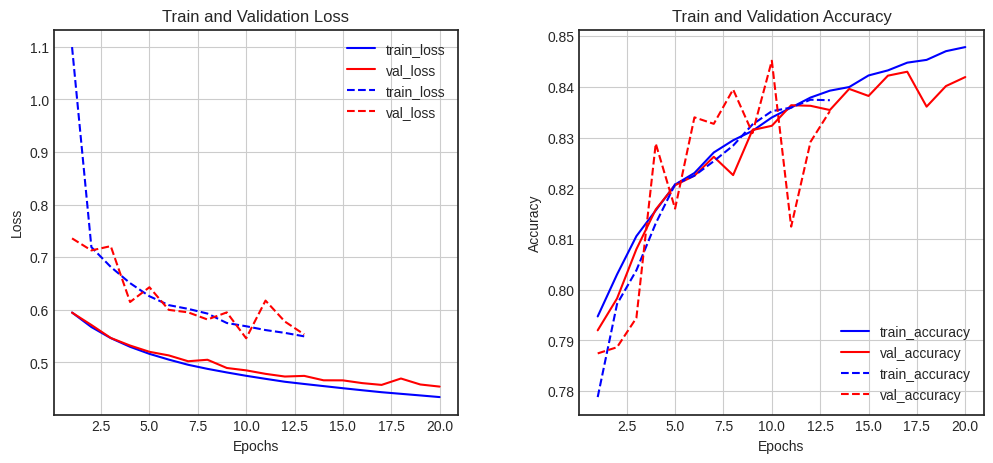

In [42]:
diff_history(history, history4)

In [43]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5623 - accuracy: 0.8340


[0.5623486638069153, 0.8339999914169312]

In [44]:
from keras.layers import Dropout


model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='ADAM',
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
history5 = model.fit(x_train, y_train,
                     epochs=20,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/20
1313/1313 [==============================] - 18s 13ms/step - loss: 1.1402 - accuracy: 0.7648 - val_loss: 0.8831 - val_accuracy: 0.7385
Epoch 2/20
1313/1313 [==============================] - 16s 12ms/step - loss: 0.7587 - accuracy: 0.7843 - val_loss: 0.7165 - val_accuracy: 0.7962
Epoch 3/20
1313/1313 [==============================] - 15s 12ms/step - loss: 0.7344 - accuracy: 0.7895 - val_loss: 0.6896 - val_accuracy: 0.8063
Epoch 4/20
1313/1313 [==============================] - 15s 12ms/step - loss: 0.7160 - accuracy: 0.7970 - val_loss: 0.6859 - val_accuracy: 0.8079
Epoch 5/20
1313/1313 [==============================] - 15s 11ms/step - loss: 0.6958 - accuracy: 0.7982 - val_loss: 0.7131 - val_accuracy: 0.7963
Epoch 6/20
1313/1313 [==============================] - 14s 11ms/step - loss: 0.6805 - accuracy: 0.8027 - val_loss: 0.6678 - val_accuracy: 0.8039
Epoch 7/20
1313/1313 [==============================] - 15s 11ms/step - loss: 0.6718 - accuracy: 0.8045 - val_loss: 0.7143 -

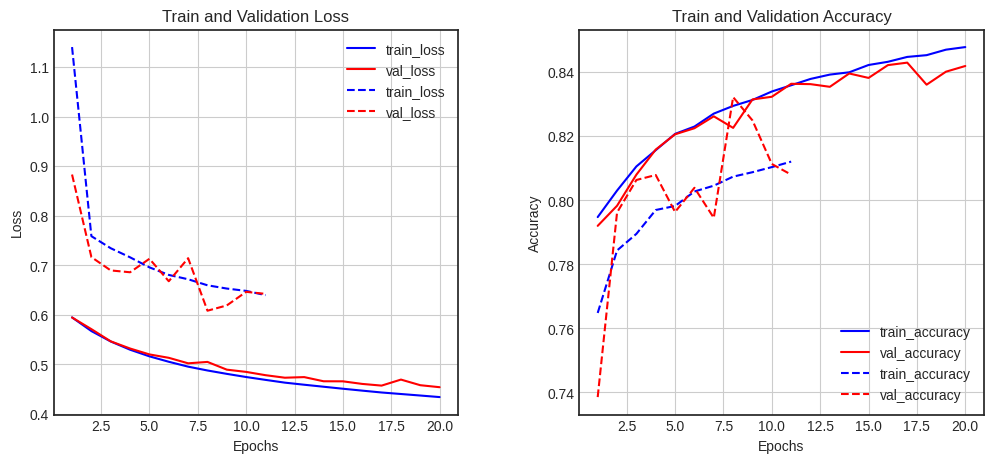

In [46]:
diff_history(history, history5)

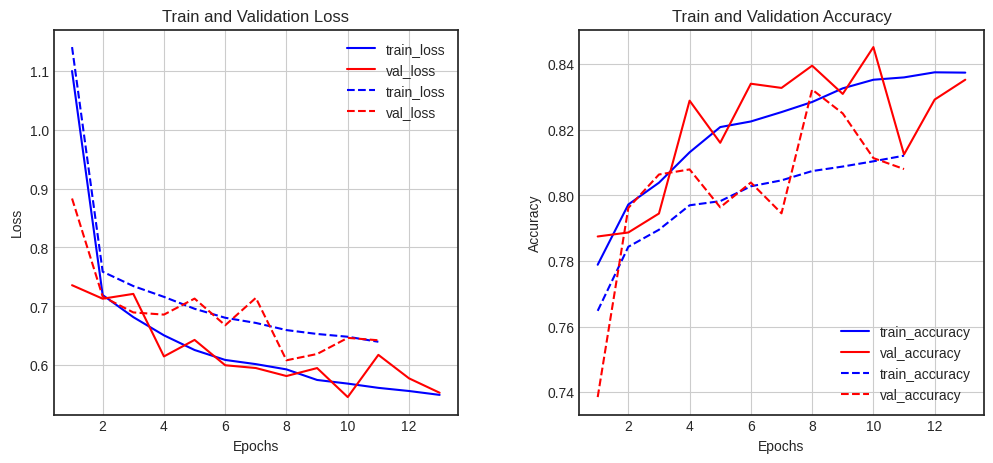

In [47]:
diff_history(history4, history5)

In [48]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.6261 - accuracy: 0.8250


[0.6260983943939209, 0.824999988079071]

In [49]:
from keras.layers import BatchNormalization

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='ADAM',
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 409098 (1.56 MB)
Trainable params: 408074 (1.56 MB)
Non-trainable params: 1024 (4.00 KB)
_________________________________________________________________


In [50]:
history6 = model.fit(x_train, y_train,
                     epochs=20,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/20
1313/1313 [==============================] - 16s 11ms/step - loss: 1.3500 - accuracy: 0.7901 - val_loss: 0.9816 - val_accuracy: 0.6883
Epoch 2/20
1313/1313 [==============================] - 15s 11ms/step - loss: 0.7502 - accuracy: 0.7981 - val_loss: 1.2968 - val_accuracy: 0.6137
Epoch 3/20
1313/1313 [==============================] - 16s 12ms/step - loss: 0.7343 - accuracy: 0.8000 - val_loss: 1.0678 - val_accuracy: 0.7223
Epoch 4/20
1313/1313 [==============================] - 15s 11ms/step - loss: 0.7163 - accuracy: 0.8024 - val_loss: 0.6955 - val_accuracy: 0.8174
Epoch 5/20
1313/1313 [==============================] - 16s 12ms/step - loss: 0.7082 - accuracy: 0.8019 - val_loss: 1.1874 - val_accuracy: 0.6398
Epoch 6/20
1313/1313 [==============================] - 16s 12ms/step - loss: 0.7104 - accuracy: 0.8001 - val_loss: 1.2511 - val_accuracy: 0.6666
Epoch 7/20
1313/1313 [==============================] - 16s 12ms/step - loss: 0.6806 - accuracy: 0.8084 - val_loss: 1.4309 -

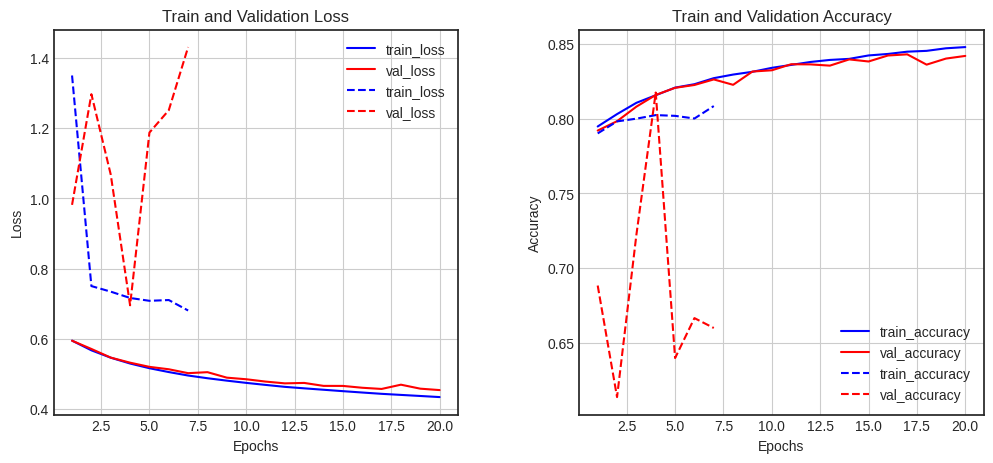

In [51]:
diff_history(history, history6)

In [52]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7148 - accuracy: 0.8107


[0.714806079864502, 0.810699999332428]

In [53]:

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='ADAM',
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 409098 (1.56 MB)
Trainable params: 408074 (1.56 MB)
Non-trainable params: 1024 (4.00 KB)
_________________________________________________________________


In [54]:
history7 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 17s 12ms/step - loss: 1.3880 - accuracy: 0.7878 - val_loss: 0.8859 - val_accuracy: 0.7469
Epoch 2/60
1313/1313 [==============================] - 15s 11ms/step - loss: 0.7506 - accuracy: 0.7995 - val_loss: 0.7803 - val_accuracy: 0.7861
Epoch 3/60
1313/1313 [==============================] - 15s 12ms/step - loss: 0.7404 - accuracy: 0.7989 - val_loss: 0.8024 - val_accuracy: 0.7634
Epoch 4/60
1313/1313 [==============================] - 15s 12ms/step - loss: 0.7239 - accuracy: 0.8003 - val_loss: 1.2558 - val_accuracy: 0.7013
Epoch 5/60
1313/1313 [==============================] - 14s 11ms/step - loss: 0.7060 - accuracy: 0.8059 - val_loss: 0.7451 - val_accuracy: 0.7923
Epoch 6/60
1313/1313 [==============================] - 14s 11ms/step - loss: 0.6922 - accuracy: 0.8072 - val_loss: 0.7391 - val_accuracy: 0.7783
Epoch 7/60
1313/1313 [==============================] - 15s 11ms/step - loss: 0.6954 - accuracy: 0.8042 - val_loss: 0.9008 -

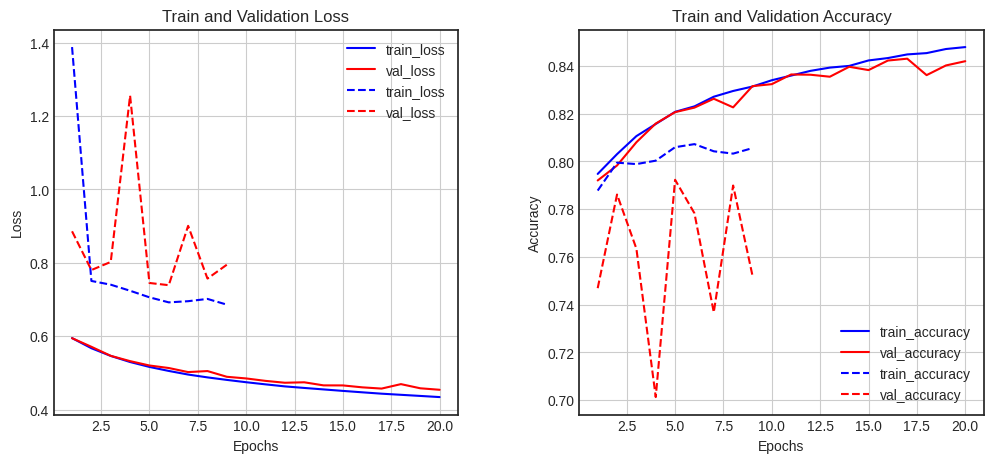

In [55]:
diff_history(history, history7)

In [56]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7628 - accuracy: 0.7693


[0.7628483176231384, 0.7692999839782715]

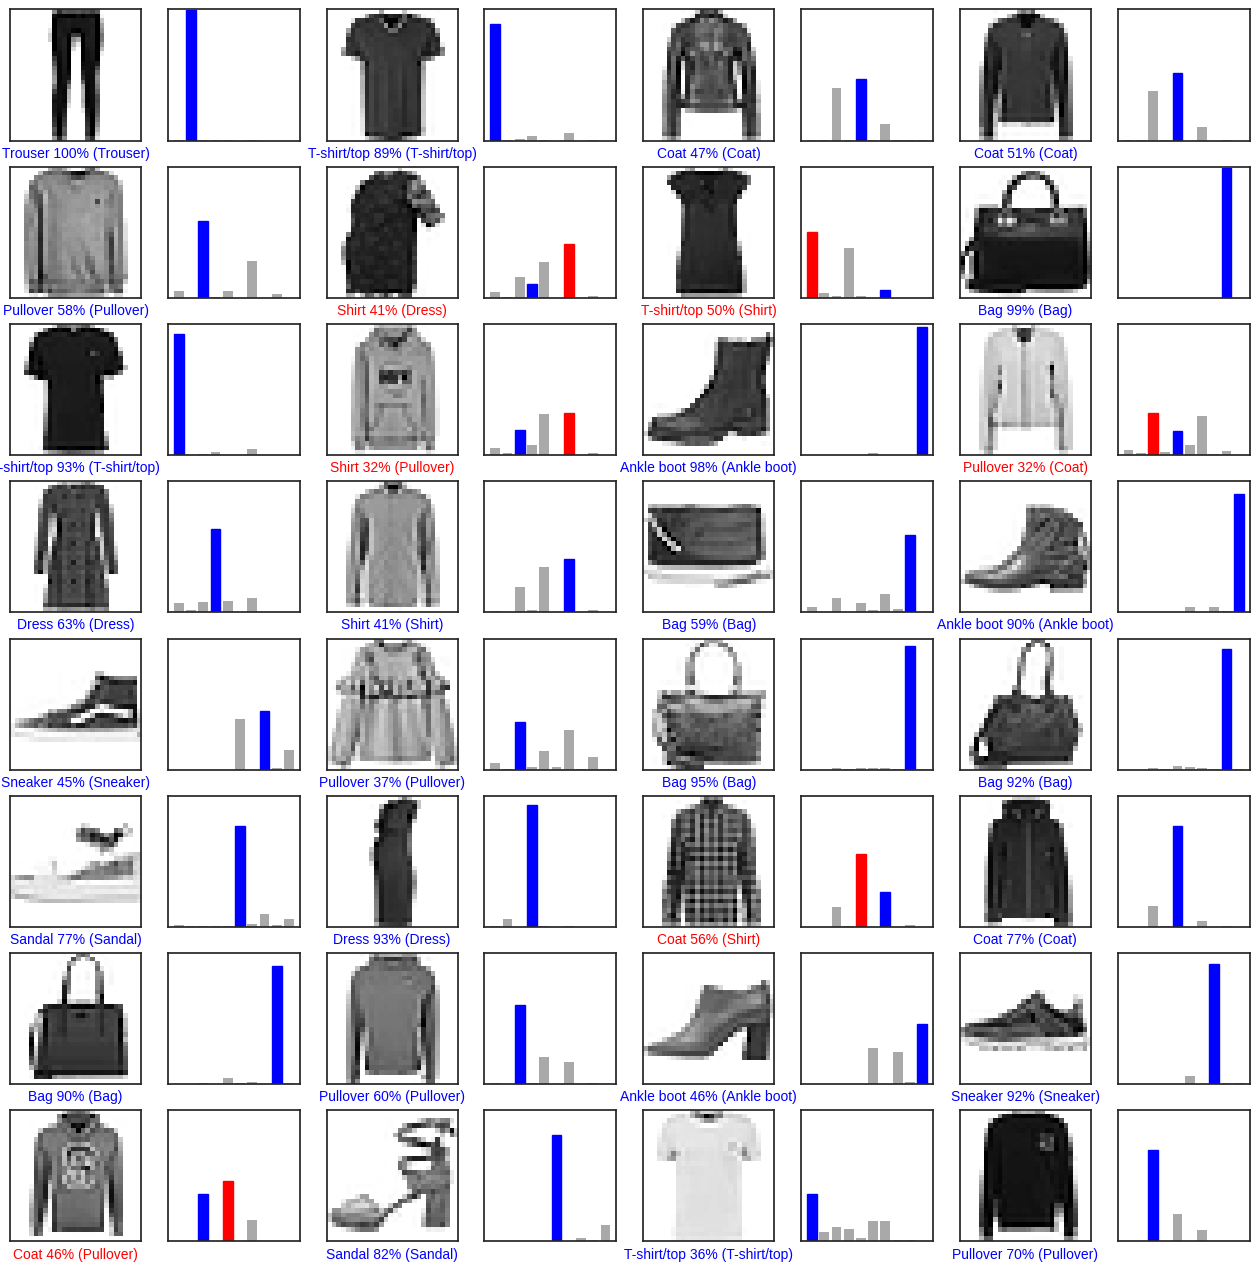

In [57]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [58]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1),
                            np.argmax(pred_ys, axis=-1),
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.76      0.77      0.76      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.65      0.68      0.66      1000
       Dress       0.73      0.87      0.79      1000
        Coat       0.64      0.71      0.67      1000
      Sandal       0.86      0.81      0.83      1000
       Shirt       0.54      0.33      0.41      1000
     Sneaker       0.82      0.87      0.84      1000
         Bag       0.90      0.91      0.91      1000
  Ankle boot       0.88      0.92      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.77      0.78      0.77     10000



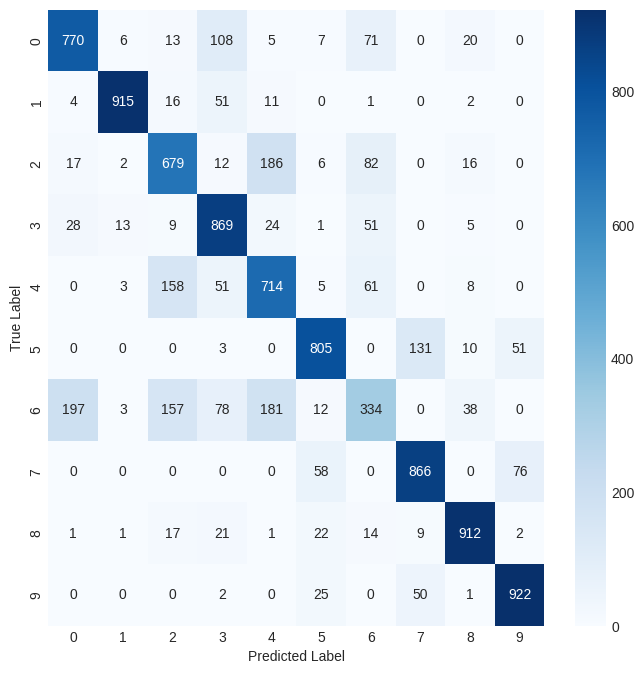

In [59]:
plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()